OVERVIEW

The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

PART 1

IMPORT FILES

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


READ FILE

In [29]:
df = pd.read_csv('../DS2023/sleep.csv')

In [30]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


CHECK INFO

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [32]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


CHECK IF THERE IS NULL

In [33]:
df.isnull().sum() 

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum() 

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

CHECK COLUMNS NAME

In [36]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

CHANGE COLUMNS NAME

In [37]:
df.columns=['id','age','gender','bed_time','wakeup_time','sleep_duration','sleep_efficiency','remsleep_percentage','deepsleep_percentage','lightsleep_percentage','awakenings','caffeine_consumption','alcohol_consumption','smoking_status','exercise_frequency']
df

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [38]:
df.shape

(388, 15)

CHECK IF THERE IS DUPLICATE

In [39]:
df[df.duplicated()]

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency


In [40]:
df.dropna(inplace=True)
df

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [41]:
df.describe()

,id,age,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,226.260309,40.829897,7.451031,0.789253,22.680412,52.822165,24.497423,1.618557,22.680412,1.146907,1.757732
std,129.578114,13.403187,0.883483,0.135706,3.430510,15.571518,15.309638,1.355958,28.997566,1.612793,1.447824
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,111.750000,29.000000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,228.500000,41.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,24.000000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


CHECK DATA TYPES

In [42]:
df.dtypes

id                         int64
age                        int64
gender                    object
bed_time                  object
wakeup_time               object
sleep_duration           float64
sleep_efficiency         float64
remsleep_percentage        int64
deepsleep_percentage       int64
lightsleep_percentage      int64
awakenings               float64
caffeine_consumption     float64
alcohol_consumption      float64
smoking_status            object
exercise_frequency       float64
dtype: object

PART 2

DATA & ANALYSIS

In [31]:
df.to_csv("updated_sleepr1.csv")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('../DS2023/updated_sleepr1.csv')

In [3]:
df.head()

,Unnamed: 0,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [5]:
df.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [6]:
# we will only explore the sleep_duration and sleep_efficiency variables
sleep_duration= df['sleep_duration']
sleep_efficiency= df['sleep_efficiency']
df.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


1.Find the mean, standard deviation, and the standard error of the mean for variable sleep_duration

In [7]:
# A:
mean_sleep_duration = sleep_duration.mean()
sd_sleep_duration = sleep_duration.std()
sem_sleep_duration = sd_sleep_duration/np.sqrt(len(sleep_duration))
print(f'mean sleep_duration is {mean_sleep_duration:.4f}')
print(f'std dev of sleep_duration is {sd_sleep_duration:.4f}')
print(f'std error of mean is {sem_sleep_duration:.4f}')

mean sleep_duration is 7.4510
std dev of sleep_duration is 0.8835
std error of mean is 0.0449


In [8]:
# scipy standard error function
from scipy.stats import sem
sem(sleep_duration)

0.044852035378323975

2.Generate a 90%, 95%, and 99% confidence interval for sleep_duration

In [9]:
from scipy.stats import t

In [10]:
# A: Test t.interval
t.interval(0.90, len(sleep_duration)-1,loc=mean_sleep_duration, scale=sem_sleep_duration)

(7.377078868825464, 7.524982986844639)

In [12]:
#Write a function to calculate the confidence interval
def calculate_tinterval(confidence_level,vector):
    n = len(vector)
    t_interval = t.interval(confidence_level,
                           n-1,
                           loc=vector.mean(),
                           scale=vector.std()/n**0.5)
    return t_interval

In [14]:
for confidence_level in [0.9,0.95,0.99]:
    
    lower, upper = calculate_tinterval(confidence_level,sleep_duration)

    print(f"We are {confidence_level*100}% confident that the true mean value for 'sleep_duration' is between {lower:.2f} and {upper:.2f} .")

We are 90.0% confident that the true mean value for 'sleep_duration' is between 7.38 and 7.52 .
We are 95.0% confident that the true mean value for 'sleep_duration' is between 7.36 and 7.54 .
We are 99.0% confident that the true mean value for 'sleep_duration' is between 7.33 and 7.57 .


<AxesSubplot:>

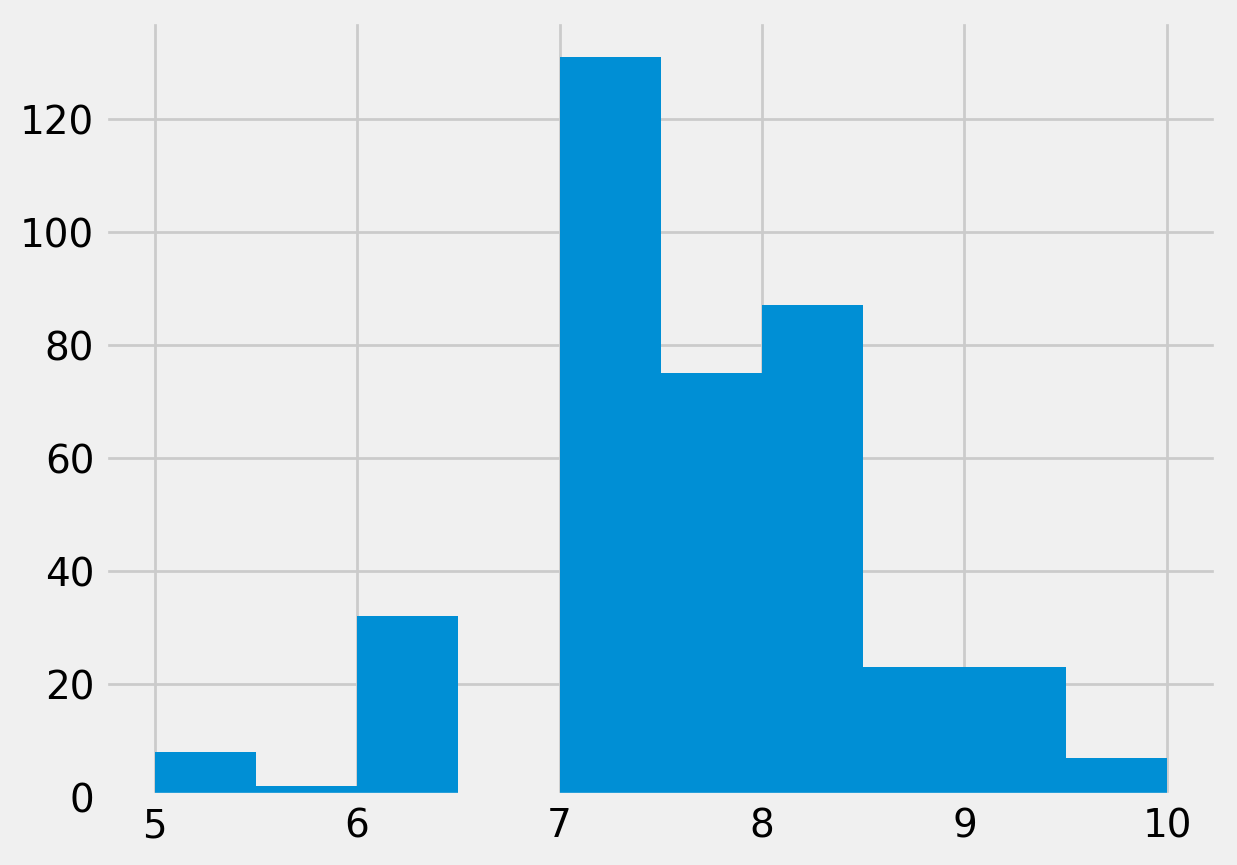

In [15]:
sleep_duration.hist()

3.For the variable sleep_efficiency, generate a 95% confidence interval and interpret it.

In [16]:
# A:
lower, upper = calculate_tinterval(0.95, sleep_efficiency)
print(f"We are 95% confident that the true mean value for ' sleep_efficiency' is between {lower:.2f} and {upper:.2f} of sleep_duration.")

We are 95% confident that the true mean value for ' sleep_efficiency' is between 0.78 and 0.80 of sleep_duration.


4.For the variable sleep_efficiency, we are going to test the hypothesis that the (true) mean is equal to the sample median In this case, we are performing the hypothesis test to test the mean based on a single sample. These are the steps: Define hypothesis Set alpha (Let alpha = 0.05) Calculate point estimate Calculate test statistic Find the p-value Interpret results

In [21]:
## Step 1: Define hypotheses.
### H_0: mu_sleep_efficiency = M_sleep_efficiency
### H_A: mu_sleep_efficiency != M_sleep_efficiency

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = sleep_efficiency.mean()
sample_median = 0.78
sample_std = sleep_efficiency.std()
sample_size = len(sleep_efficiency)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - sample_median)/(sample_std/sample_size**0.5)

## Step 5: Find p-value.
## t.sf is survival function, which is 1-cdf at a given value 
## (proportion of values at least as extreme as...)
p_value = t.sf(np.abs(t_statistic), len(sleep_efficiency)-1) * 2 


## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)
print("Our sample median is {:.4f}.".format(0.78))
print("Our sample mean is {:.4f}.".format(sample_mean))
print("Our t-statistic is {:.6f}.".format(t_statistic))
print("Our p-value is {:.6f}.".format(p_value))

if p_value < alpha:
    print("We reject our null hypothesis and conclude that the true mean sleep_efficiency value is different from the median sleep_efficiency value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the true mean sleep_efficiency value is different from the median .")
else:
    print("Our test is inconclusive.")

Our sample median is 0.7800.
Our sample mean is 0.7893.
Our t-statistic is 1.343007.
Our p-value is 0.180057.
We fail to reject our null hypothesis and cannot conclude that the true mean sleep_efficiency value is different from the median .


##SAMPLE t-test

In [20]:
from scipy import stats

stats.ttest_1samp(sleep_efficiency, sample_median)

Ttest_1sampResult(statistic=1.343006617180849, pvalue=0.18005692313355728)

If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.
A. When we calculated the median, it was 0.78. The 95% confidence interval for our mean contained 0.78 through 0.80. Since the median was outside our 95% confidence interval, this suggests that the true mean would not be equal to our median.
We then conducted the hypothesis test and found that, at the alpha = 0.05 significance level, we rejected the hypothesis that the mean and median were equal.
The results of our hypothesis test and confidence interval are in agreement here. Because our significance level (for HT) is alpha, as long as our confidence level (for CI) is 1 - alpha, the results should be in agreement.
That is, if the value of interest does not lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should be rejected at the alpha significance level. Similarly, if the value of interest does lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should not be rejected at the alpha significance level.

<AxesSubplot:>

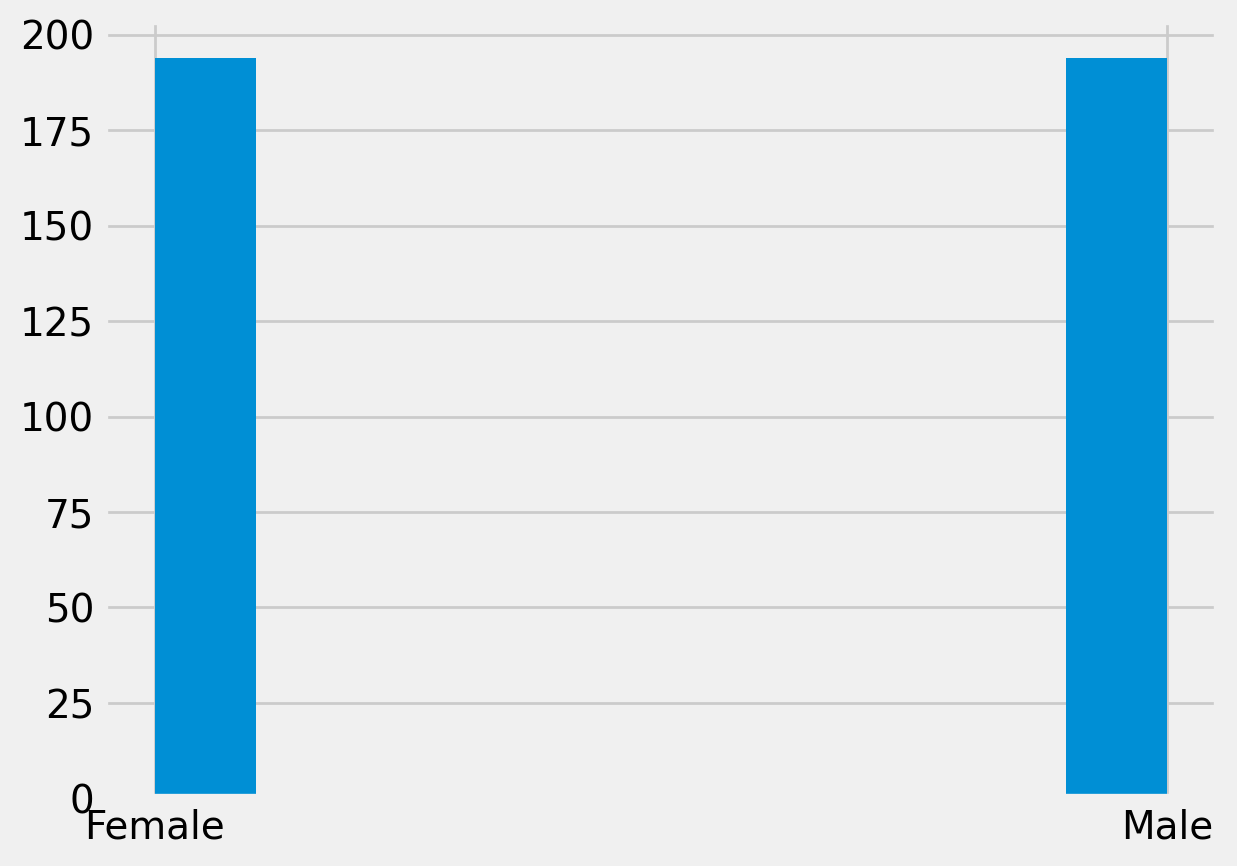

In [22]:
df.gender.hist()

<AxesSubplot:>

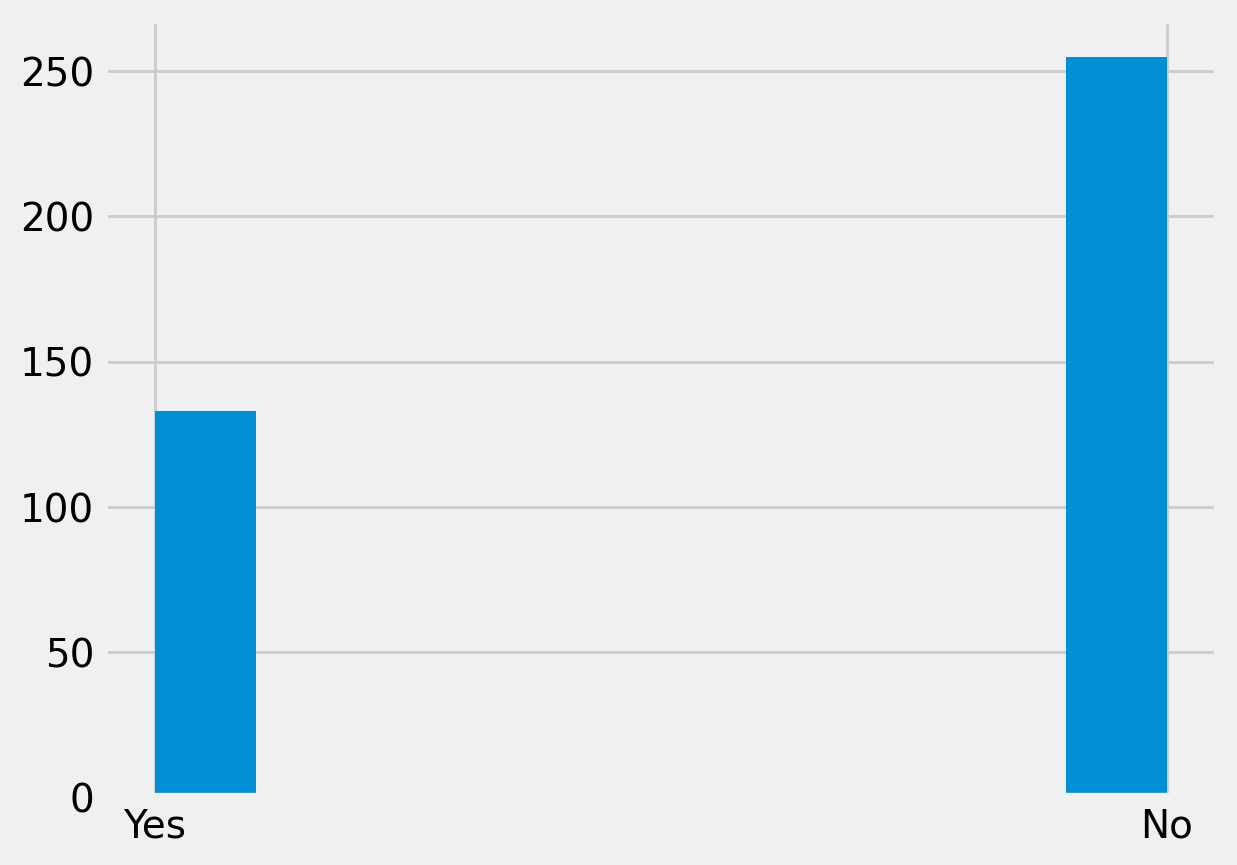

In [23]:
df.smoking_status.hist()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='sleep_duration', ylabel='sleep_efficiency'>

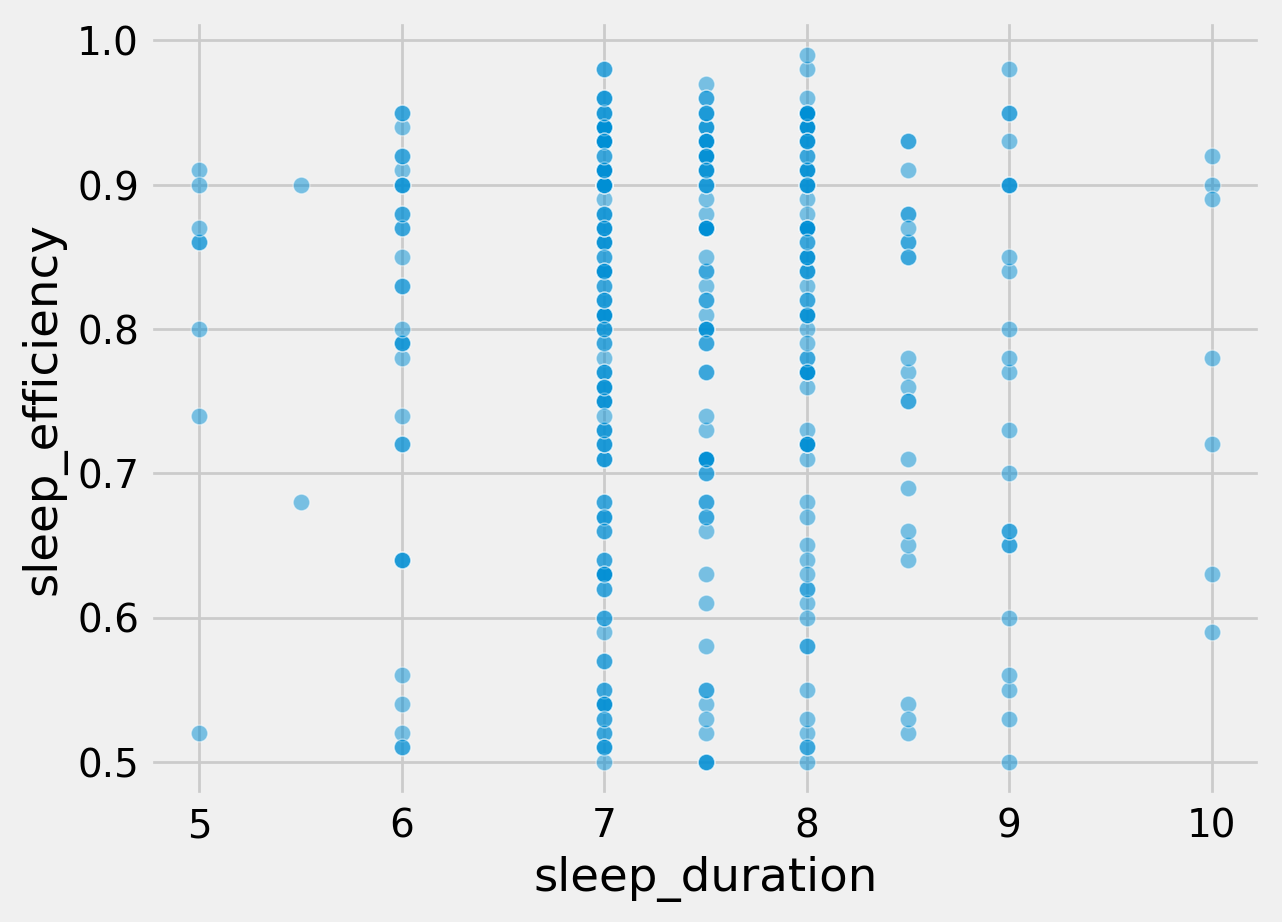

In [25]:
# Using Seaborn
sns.scatterplot(data = df, x='sleep_duration',y='sleep_efficiency',cmap = 'cut',alpha=0.5)

<AxesSubplot:xlabel='caffeine_consumption', ylabel='sleep_efficiency'>

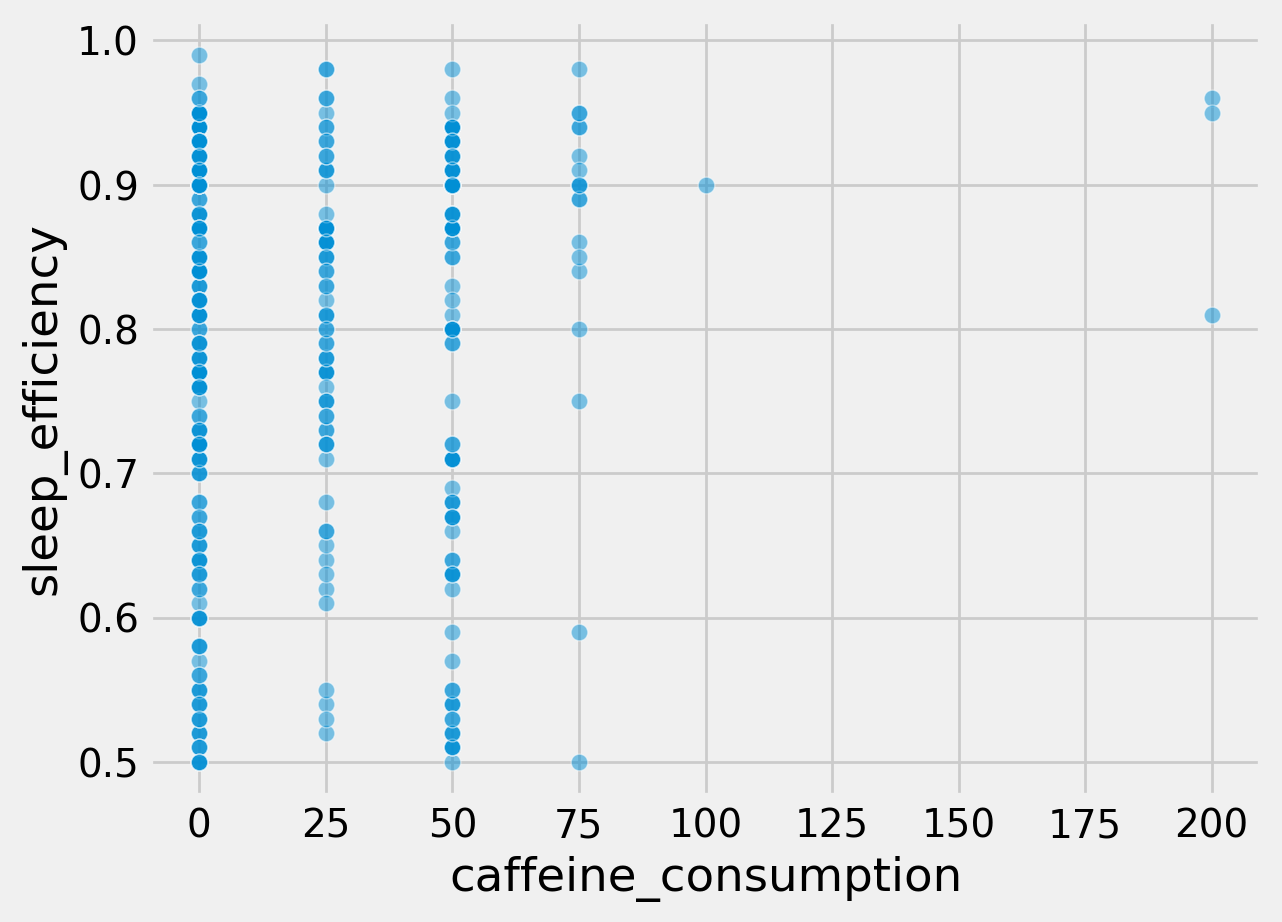

In [26]:
# Using Seaborn
sns.scatterplot(data = df, x='caffeine_consumption',y='sleep_efficiency',cmap = 'cut',alpha=0.5)

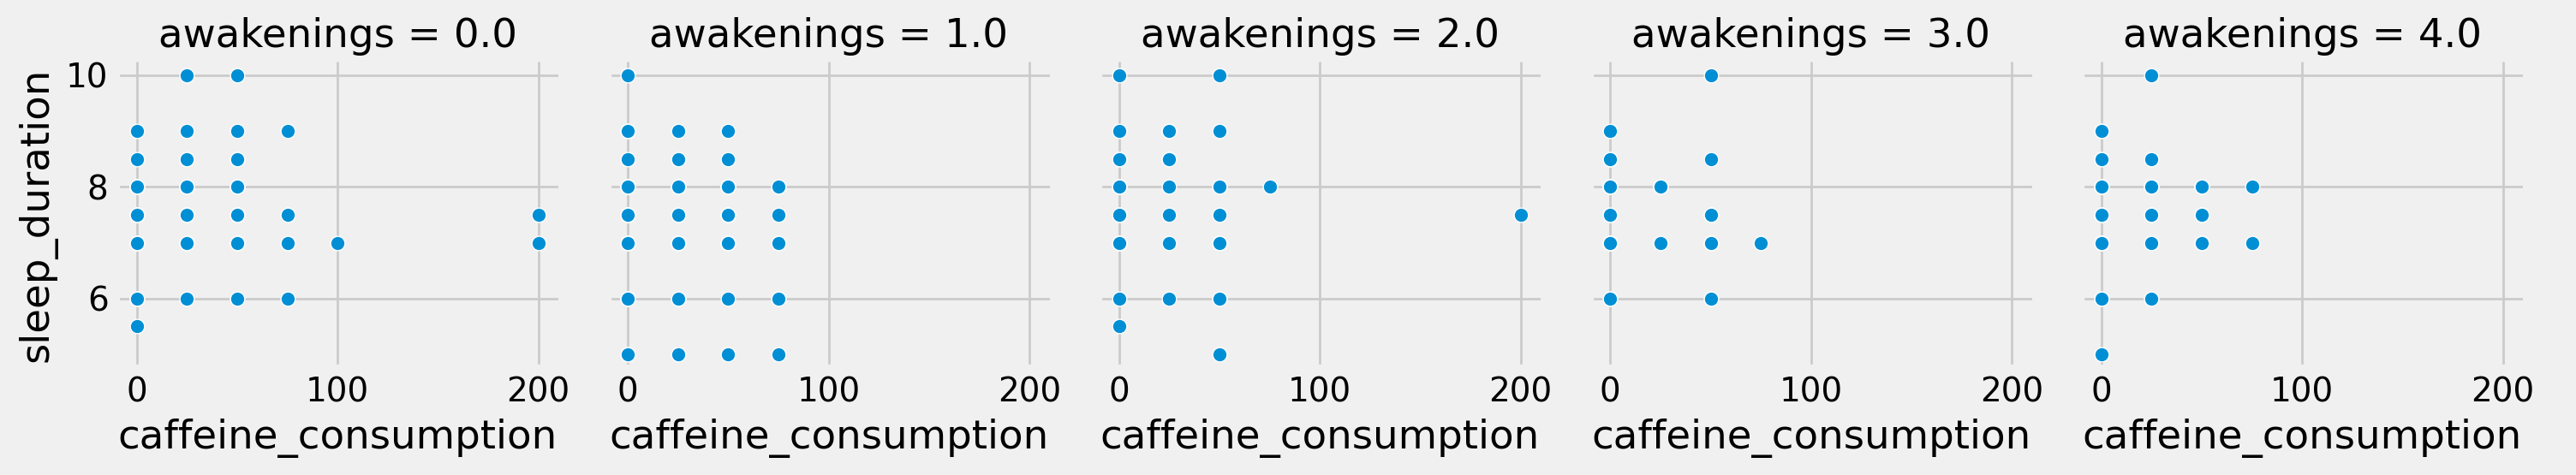

In [27]:
#Using Seaborn
# For example, creating a FacetGrid object where each column represents awakenings
ax = sns.FacetGrid(df, col='awakenings')

# Now map the plotting function onto the facets
ax.map(sns.scatterplot,'caffeine_consumption','sleep_duration')
ax.add_legend()
plt.show()

In [28]:
import pandas as pd
corr_mat = df.corr()
corr_mat


,id,age,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency
id,1.000000,0.012011,0.030504,0.025931,0.086319,-0.015469,-0.003608,-0.084746,-0.056247,0.089620,0.009799
age,0.012011,1.000000,-0.065951,0.124093,0.015449,0.058156,-0.062613,-0.004006,-0.169057,0.069295,0.071241
sleep_duration,0.030504,-0.065951,1.000000,-0.019164,-0.015408,-0.035477,0.039536,-0.009162,-0.030922,-0.048436,-0.046671
sleep_efficiency,0.025931,0.124093,-0.019164,1.000000,0.064038,0.789087,-0.816934,-0.567885,0.070804,-0.397012,0.266050
remsleep_percentage,0.086319,0.015449,-0.015408,0.064038,1.000000,-0.185850,-0.035046,-0.024608,0.113965,-0.039597,0.044200
deepsleep_percentage,-0.015469,0.058156,-0.035477,0.789087,-0.185850,1.000000,-0.975461,-0.327284,-0.024522,-0.374614,0.171841
lightsleep_percentage,-0.003608,-0.062613,0.039536,-0.816934,-0.035046,-0.975461,1.000000,0.338397,-0.000596,0.389895,-0.184684
awakenings,-0.084746,-0.004006,-0.009162,-0.567885,-0.024608,-0.327284,0.338397,1.000000,-0.112922,0.210017,-0.231464
caffeine_consumption,-0.056247,-0.169057,-0.030922,0.070804,0.113965,-0.024522,-0.000596,-0.112922,1.000000,-0.097674,-0.082661
alcohol_consumption,0.089620,0.069295,-0.048436,-0.397012,-0.039597,-0.374614,0.389895,0.210017,-0.097674,1.000000,0.004215


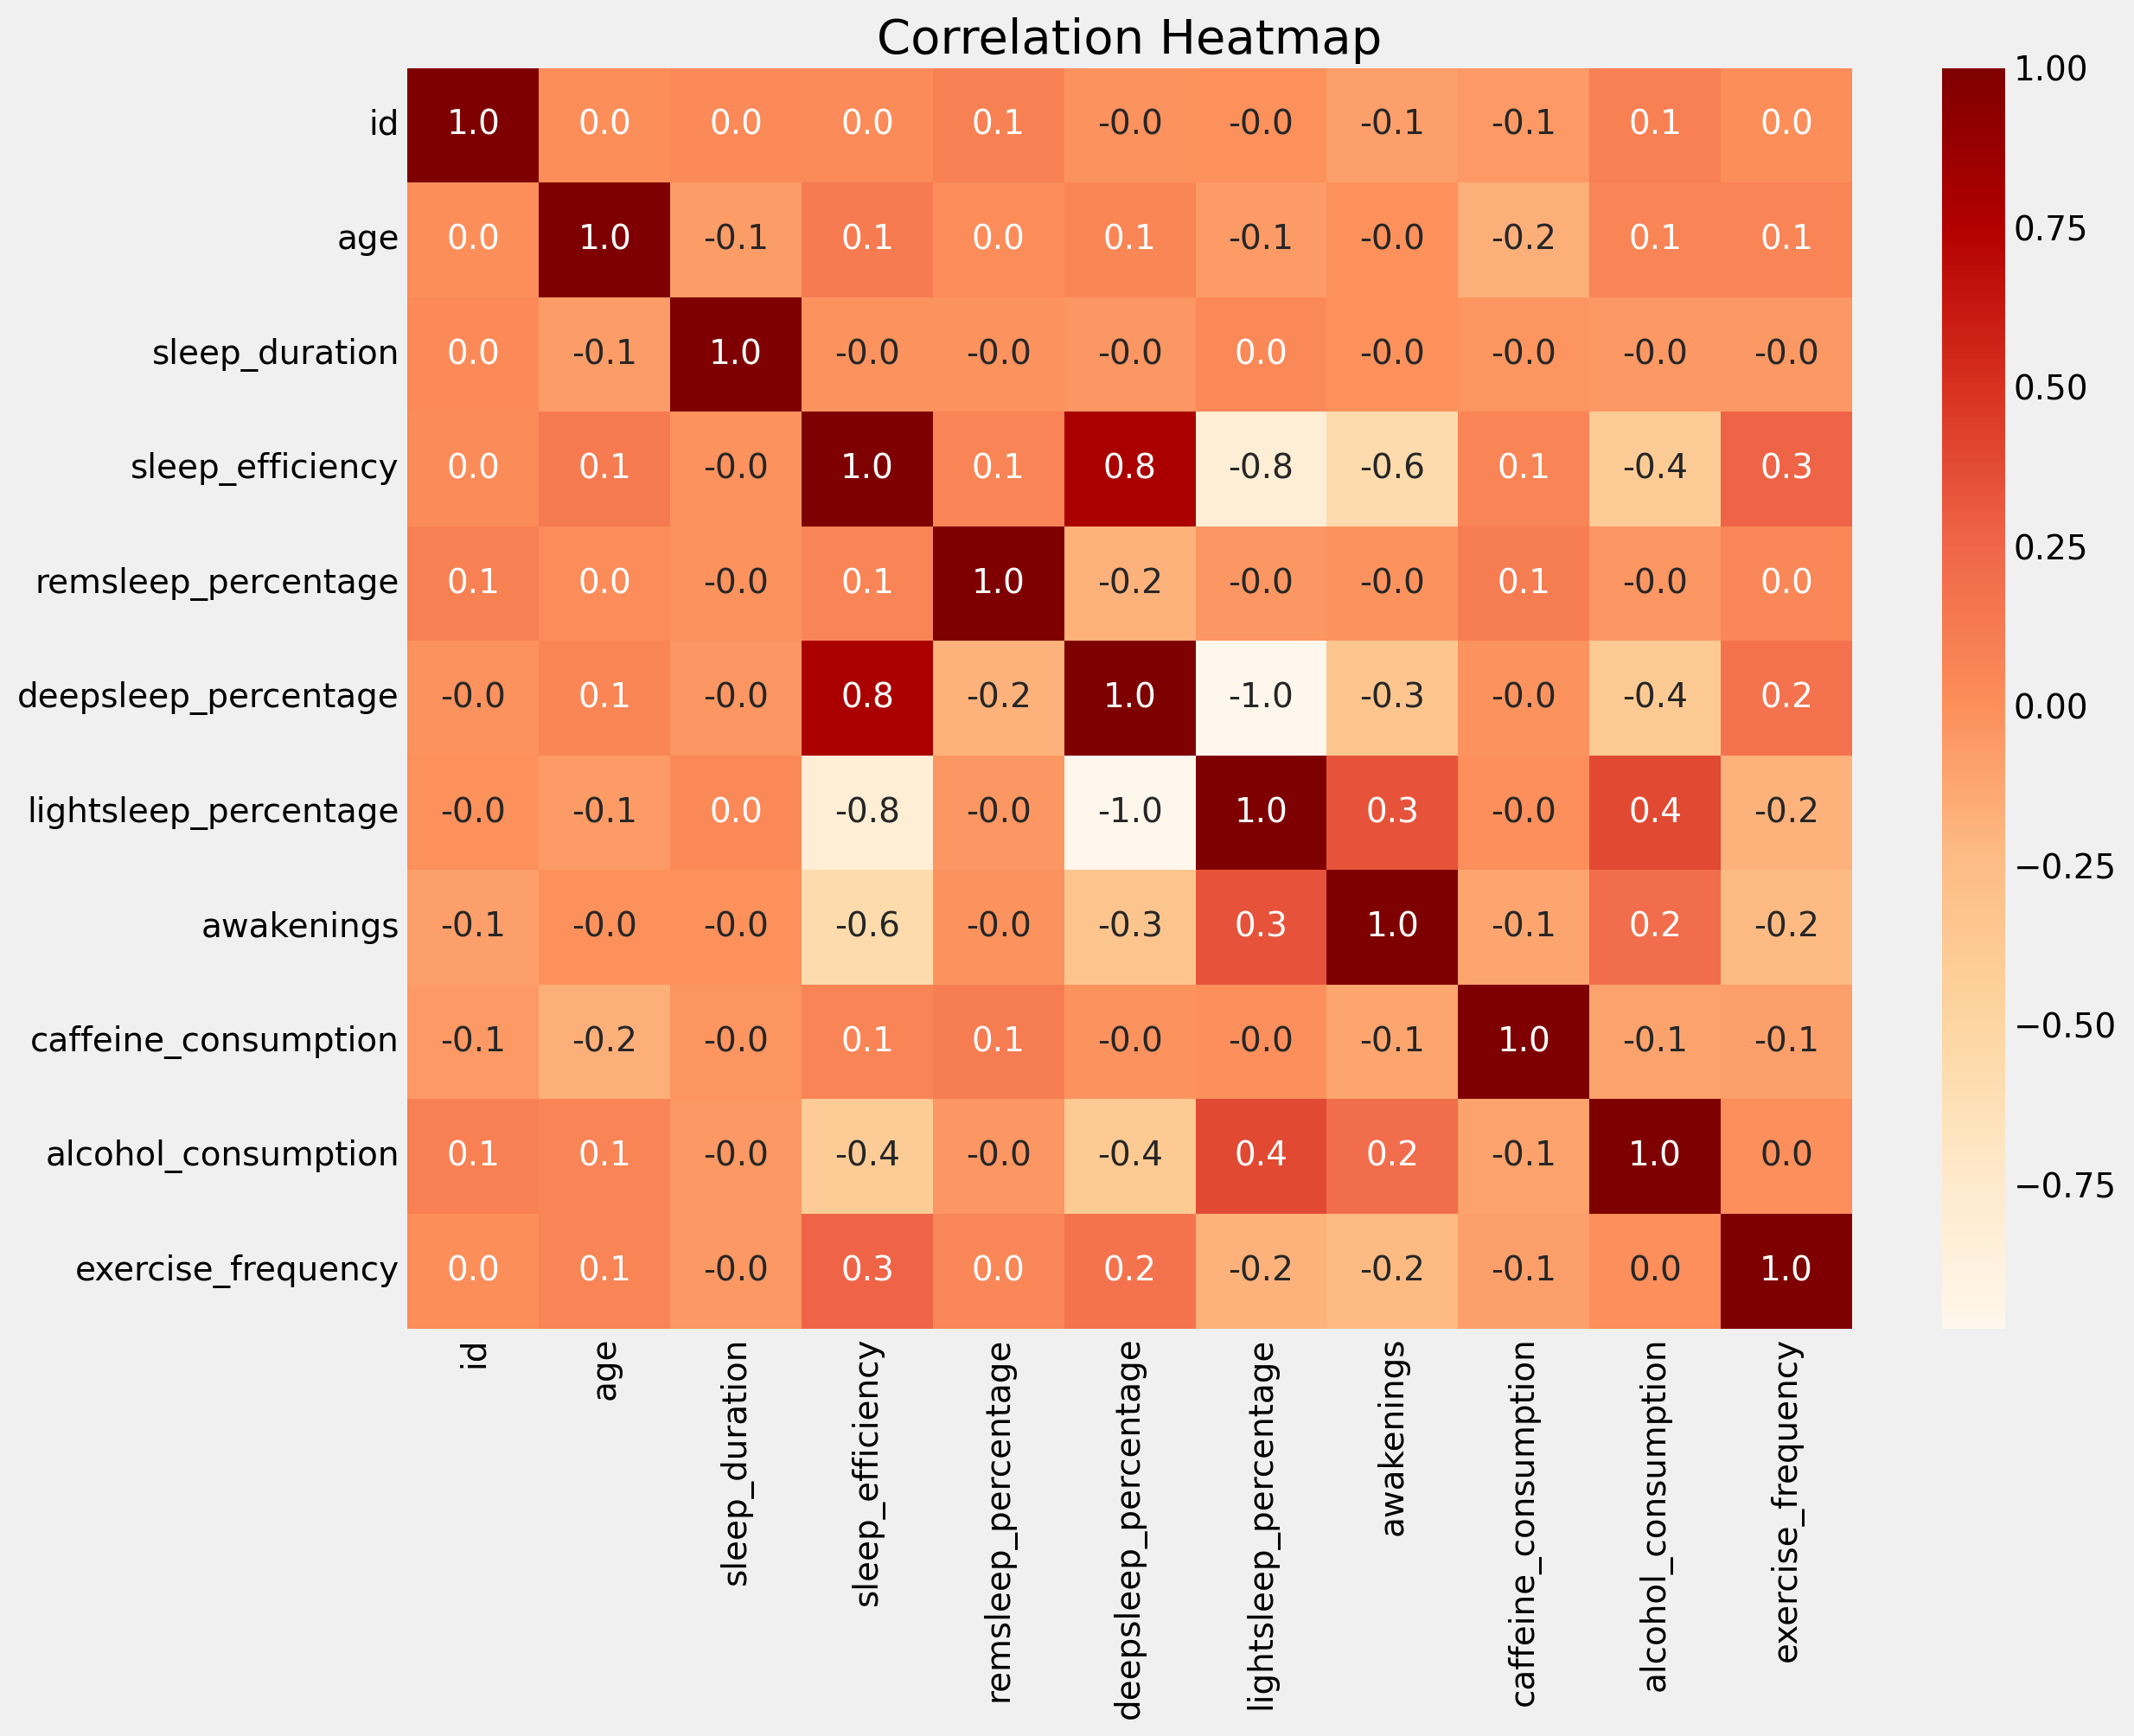

In [29]:
# Create heatmap
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.heatmap(corr_mat, 
               annot=True, 
               fmt="0.01f", 
               cmap="OrRd")
ax.set_title('Correlation Heatmap')
plt.show()


<AxesSubplot:>

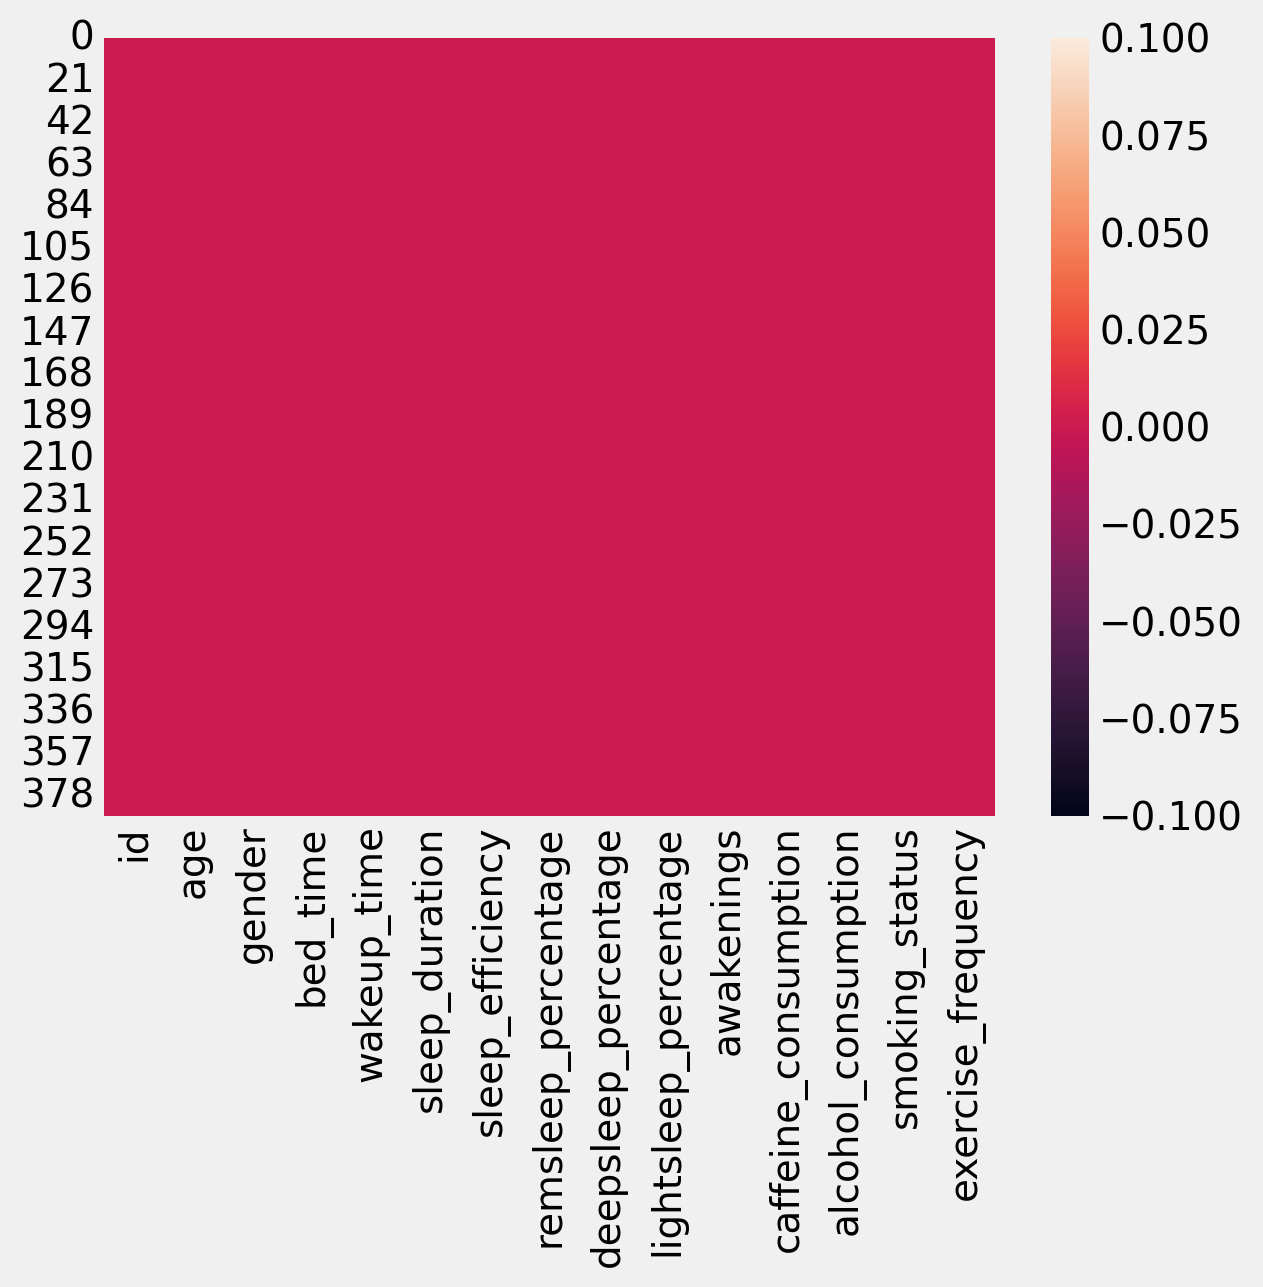

In [30]:
sns.heatmap(df.isnull())

PART 3

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [118]:
df = pd.read_csv('../DS2023/updated_sleepr1.csv')

In [119]:
df.head()

,Unnamed: 0,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [120]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [121]:
df.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [122]:
df.drop('bed_time', axis=1, inplace = True)

In [123]:
df.head()

,id,age,gender,wakeup_time,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [124]:
df.drop('wakeup_time', axis=1, inplace = True)

In [125]:
df.head()

,id,age,gender,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [126]:
df.dropna(inplace=True)
df

,id,age,gender,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,446,30,Female,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
384,448,27,Female,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
385,449,52,Male,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
386,451,45,Male,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [147]:
# split input and target
X= df.drop(["deepsleep_percentage"],axis=1)
y= df.deepsleep_percentage.values #input

In [148]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0) 

In [149]:
#Accuracy for LR

accuracies = {} #empty dictionary to combine the accuracies of all algorithm

lr = LogisticRegression() #create model
lr.fit(X_train,y_train) #fit the training data

acc = lr.score(X_test,y_test)*100 #compute accuracy of model

accuracies['LogisticRegression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 24.36%


/Users/keyna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
#df['gender'] = df['gender'].apply(lambda x: float('1.0') if str(x) == 'Male' else x)

In [145]:
#df['smoking_status'] = df['smoking_status'].apply(lambda x: float('1.0') if str(x) == 'Yes' else x)

In [146]:
#df.dropna(inplace=True)
#df

,id,age,gender,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,2.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1.0,3.0
1,2,69,1.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1.0,3.0
2,3,40,2.0,8.0,0.89,20,70,10,1.0,0.0,0.0,2.0,3.0
3,4,40,2.0,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,1.0
4,5,57,1.0,8.0,0.76,27,55,18,3.0,0.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,446,30,2.0,7.5,0.53,28,20,52,4.0,50.0,2.0,1.0,1.0
384,448,27,2.0,7.5,0.91,22,57,21,0.0,0.0,0.0,2.0,5.0
385,449,52,1.0,6.0,0.74,28,57,15,4.0,25.0,0.0,2.0,3.0
386,451,45,1.0,7.0,0.76,18,72,10,3.0,0.0,0.0,2.0,3.0


In [150]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train) #fit the training data

acc = rf.score(X_test,y_test)*100 #compute accuracy of model

accuracies['RandomForestClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 62.82%


In [151]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train) #fit the training data

acc = dtc.score(X_test,y_test)*100 #compute accuracy of model

accuracies['DecisionTreeClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 65.38%


In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train) #fit the training data

acc = knn.score(X_test,y_test)*100 #compute accuracy of model

accuracies['KNeighborsClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 12.18%


/Users/keyna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


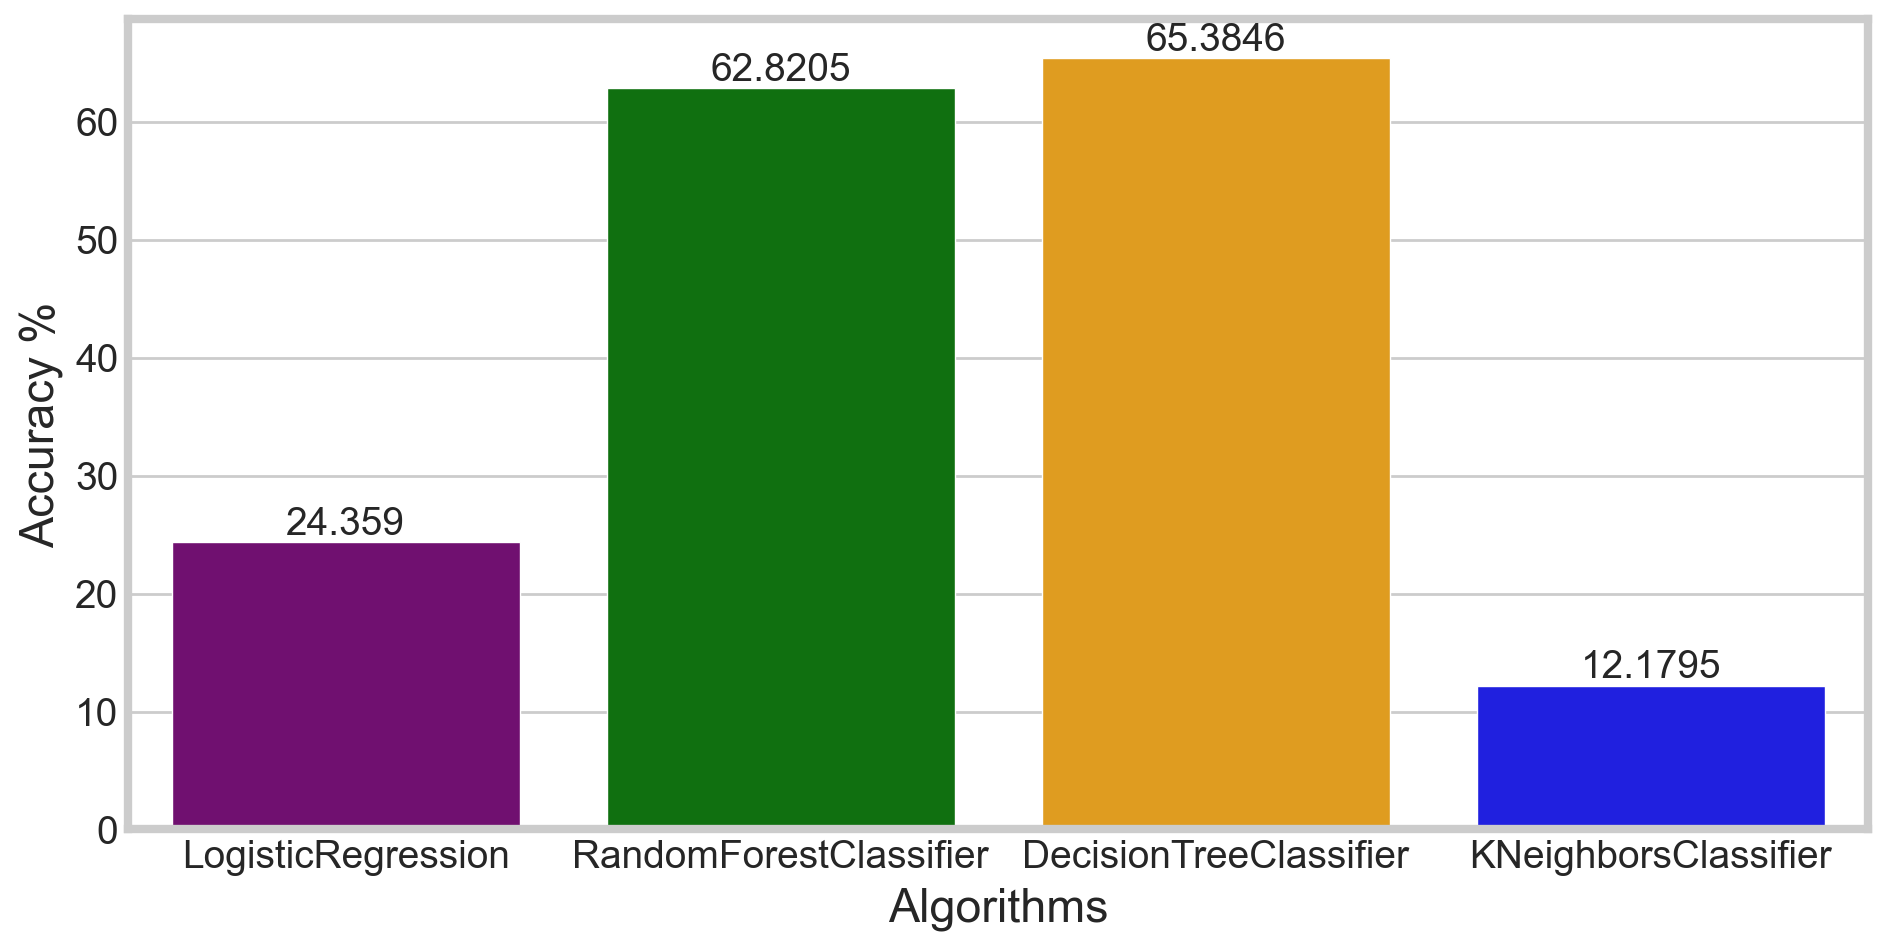

In [153]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    ax.bar_label(i, ) #function2

plt.show()

In [154]:
df.to_csv("updated_sleepr2.csv")

In [155]:
df2 = pd.read_csv('../DS2023/updated_sleepr2.csv')

In [156]:
df2.head()

,Unnamed: 0,id,age,gender,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,0,1,65,2.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1.0,3.0
1,1,2,69,1.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1.0,3.0
2,2,3,40,2.0,8.0,0.89,20,70,10,1.0,0.0,0.0,2.0,3.0
3,3,4,40,2.0,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,1.0
4,4,5,57,1.0,8.0,0.76,27,55,18,3.0,0.0,3.0,2.0,3.0


In [157]:
df2.drop('Unnamed: 0', axis=1, inplace = True)

In [158]:
df2.dropna(inplace=True)
df2

,id,age,gender,sleep_duration,sleep_efficiency,remsleep_percentage,deepsleep_percentage,lightsleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,2.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1.0,3.0
1,2,69,1.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1.0,3.0
2,3,40,2.0,8.0,0.89,20,70,10,1.0,0.0,0.0,2.0,3.0
3,4,40,2.0,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,1.0
4,5,57,1.0,8.0,0.76,27,55,18,3.0,0.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,446,30,2.0,7.5,0.53,28,20,52,4.0,50.0,2.0,1.0,1.0
384,448,27,2.0,7.5,0.91,22,57,21,0.0,0.0,0.0,2.0,5.0
385,449,52,1.0,6.0,0.74,28,57,15,4.0,25.0,0.0,2.0,3.0
386,451,45,1.0,7.0,0.76,18,72,10,3.0,0.0,0.0,2.0,3.0


In [167]:
# split input and target
X= df2.drop(["deepsleep_percentage"],axis=1)
y= df2.deepsleep_percentage.values #input

In [168]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
from sklearn.metrics import accuracy_score

dtc_classifier = DecisionTreeClassifier(random_state=42)
dtc_classifier.fit(X_train, y_train)

# Predictions
y_pred = dtc_classifier.predict(X_test)#predict the target based on model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)#compute prediction accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


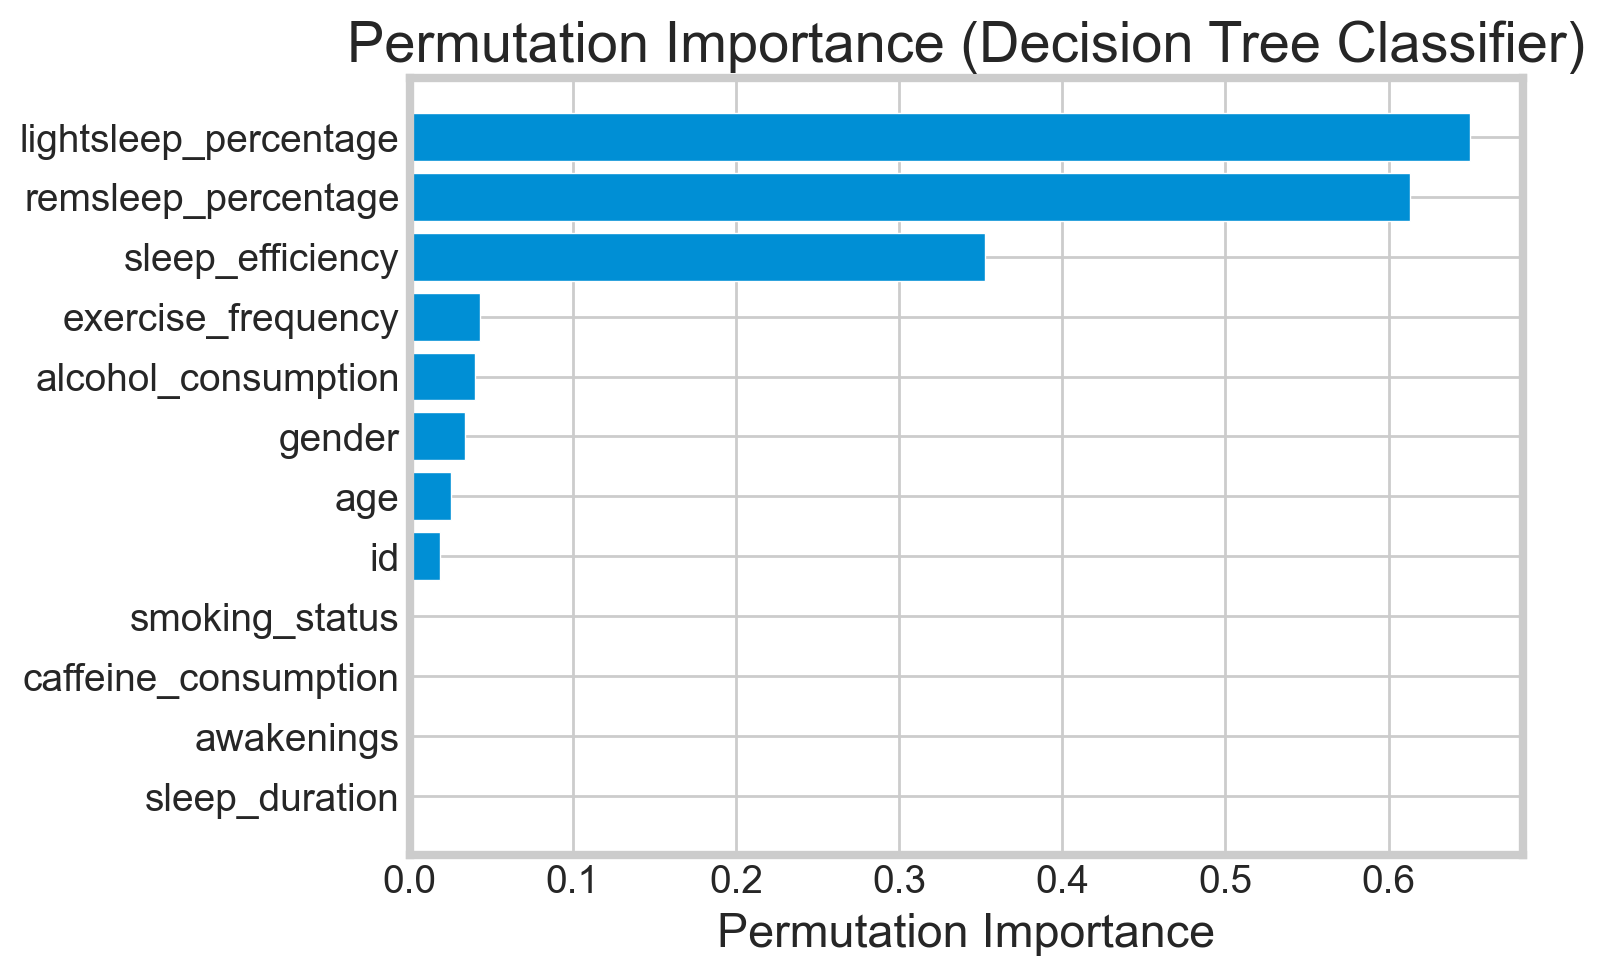

In [172]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(dtc_classifier, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)),[feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Decision Tree Classifier)')
plt.show()

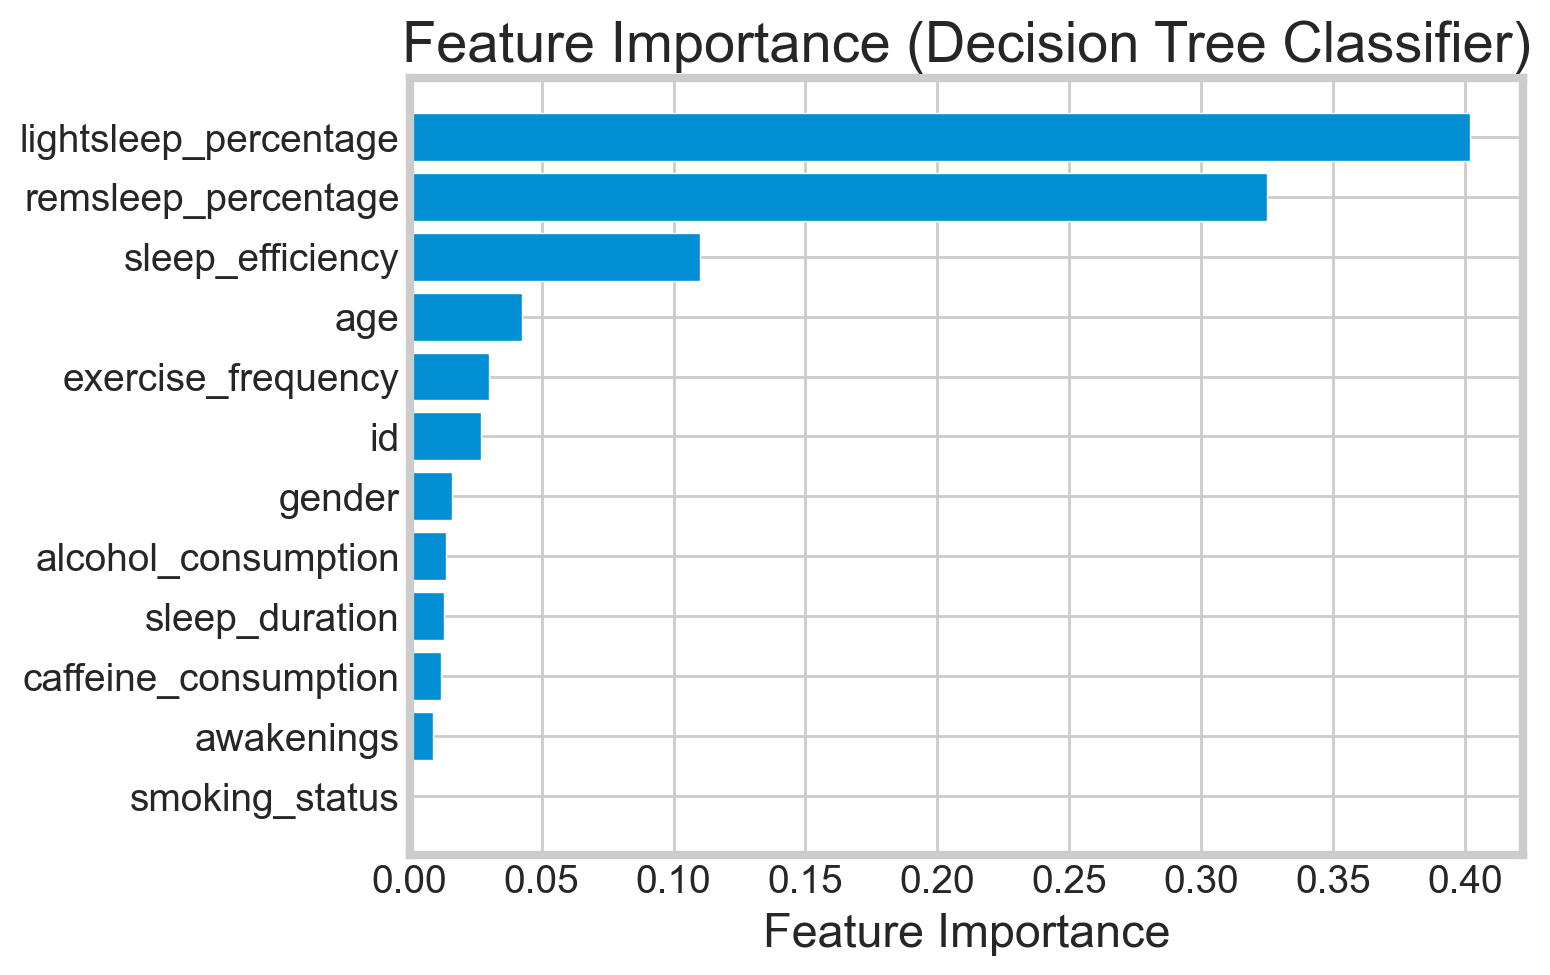

In [174]:
# Get feature importances from RandomForest
dtc_feature_importances = dtc_classifier.feature_importances_
# Sort features by importance
sorted_idx_dtc = dtc_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_dtc)), dtc_feature_importances[sorted_idx_dtc], align='center')
plt.yticks(range(len(sorted_idx_dtc)), [feature_names[i] for i in sorted_idx_dtc])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Decision Tree Classifier)')
plt.show()

CONCLUSION

The finding shows that the most important features for this analysis is depicted by several variables such as:
    1.lightsleep_percentage
    2.remsleep_percentage
    3.sleep_efficiency
    

RECOMMENDATIONS

It is recommended to use the accuracy model which use different models such as LogisticRegression,RandomForestClassifier,DecisionTreeClassifier and KNeighborsClassifier.The highest accuracy model is then later used to get the permutation importance and feature importances.